In [33]:
from keras import models
from keras import layers
from keras.datasets import reuters

Load data

In [34]:
(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

In [35]:
print(test_data[0])

[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


Prepare data

In [36]:
import numpy as np
import Funcs

x_train = Funcs.vectorize_sequences(train_data)
x_test = Funcs.vectorize_sequences(test_data)

# one_hot_train_labels = Funcs.to_one_hot(train_labels)
# one_hot_test_labels = Funcs.to_one_hot(test_labels)

y_train = np.array(train_labels)
y_test = np.array(test_labels)


Construct the network

In [37]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [38]:
d_model = models.Sequential()
d_model.add(layers.Dense(128, activation='relu', input_shape = (10000,)))
d_model.add(layers.Dropout(0.5))
d_model.add(layers.Dense(128, activation='relu'))
d_model.add(layers.Dropout(0.5))
d_model.add(layers.Dense(46, activation='softmax'))

Compile model
'categorical_crossentropy' only applicable one-hot encoding

'categorical_crossentropy' only applicable one-hot encoding

'sparse_categorical_crossentropy' only applicable integer encoding 

In [39]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
d_model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Slice the validation data

In [41]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Train the model

In [42]:
history = model.fit(partial_x_train, partial_y_train, epochs=30,
                    batch_size=512, validation_data=(x_val,y_val))

Epoch 1/30
16/16 [==============================] - 1s 35ms/step - loss: 2.3652 - accuracy: 0.4747 - val_loss: 1.5398 - val_accuracy: 0.6430
Epoch 2/30
16/16 [==============================] - 0s 25ms/step - loss: 1.3654 - accuracy: 0.6862 - val_loss: 1.2414 - val_accuracy: 0.7140
Epoch 3/30
16/16 [==============================] - 0s 28ms/step - loss: 1.0498 - accuracy: 0.7645 - val_loss: 1.1325 - val_accuracy: 0.7330
Epoch 4/30
16/16 [==============================] - 0s 25ms/step - loss: 0.8494 - accuracy: 0.8054 - val_loss: 1.1138 - val_accuracy: 0.7490
Epoch 5/30
16/16 [==============================] - 0s 26ms/step - loss: 0.6700 - accuracy: 0.8452 - val_loss: 1.0036 - val_accuracy: 0.7800
Epoch 6/30
16/16 [==============================] - 0s 26ms/step - loss: 0.5434 - accuracy: 0.8772 - val_loss: 1.0540 - val_accuracy: 0.7640
Epoch 7/30
16/16 [==============================] - 0s 25ms/step - loss: 0.4162 - accuracy: 0.9075 - val_loss: 0.9505 - val_accuracy: 0.7880
Epoch 8/30
16

In [43]:
d_history = d_model.fit(partial_x_train, partial_y_train, epochs=30,
                    batch_size=512, validation_data=(x_val,y_val))

Epoch 1/30
16/16 [==============================] - 1s 35ms/step - loss: 2.6035 - accuracy: 0.4442 - val_loss: 1.6713 - val_accuracy: 0.6000
Epoch 2/30
16/16 [==============================] - 0s 27ms/step - loss: 1.6565 - accuracy: 0.6114 - val_loss: 1.3799 - val_accuracy: 0.6830
Epoch 3/30
16/16 [==============================] - 0s 25ms/step - loss: 1.3919 - accuracy: 0.6829 - val_loss: 1.2223 - val_accuracy: 0.7100
Epoch 4/30
16/16 [==============================] - 0s 26ms/step - loss: 1.2227 - accuracy: 0.7154 - val_loss: 1.1306 - val_accuracy: 0.7410
Epoch 5/30
16/16 [==============================] - 0s 25ms/step - loss: 1.0768 - accuracy: 0.7483 - val_loss: 1.0646 - val_accuracy: 0.7610
Epoch 6/30
16/16 [==============================] - 0s 26ms/step - loss: 0.9779 - accuracy: 0.7747 - val_loss: 1.0130 - val_accuracy: 0.7800
Epoch 7/30
16/16 [==============================] - 0s 26ms/step - loss: 0.8764 - accuracy: 0.7930 - val_loss: 0.9834 - val_accuracy: 0.7940
Epoch 8/30
16

Plot the training loss

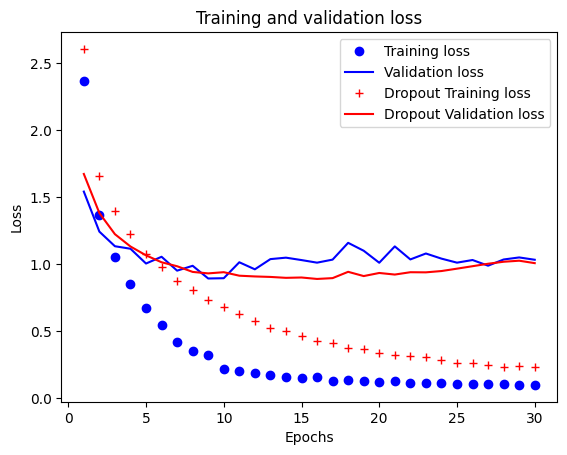

In [44]:
import matplotlib.pyplot as plt

history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

d_history_dic = d_history.history
d_loss_values = d_history_dic['loss']
d_val_loss_values = d_history_dic['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

plt.plot(epochs, d_loss_values, 'r+', label = 'Dropout Training loss')
plt.plot(epochs, d_val_loss_values, 'r', label = 'Dropout Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the accutacy

In [45]:
print(history_dic)

{'loss': [2.3651998043060303, 1.3653504848480225, 1.0497512817382812, 0.8494191765785217, 0.6700184941291809, 0.5433673858642578, 0.4162106215953827, 0.34984317421913147, 0.3251201808452606, 0.22000752389431, 0.1992926150560379, 0.1866692155599594, 0.1688961386680603, 0.15835152566432953, 0.14668551087379456, 0.15563230216503143, 0.12719449400901794, 0.13306932151317596, 0.12504942715168, 0.12025820463895798, 0.1288018822669983, 0.1126273050904274, 0.11407801508903503, 0.1118711531162262, 0.10819607973098755, 0.10229887068271637, 0.10434633493423462, 0.10888523608446121, 0.09857585281133652, 0.10073647648096085], 'accuracy': [0.47469305992126465, 0.686168909072876, 0.7644700407981873, 0.8054372072219849, 0.8451516032218933, 0.8772237300872803, 0.9075419902801514, 0.92044597864151, 0.9238286018371582, 0.9476321935653687, 0.9511400461196899, 0.9507642388343811, 0.9532698392868042, 0.9551491141319275, 0.957028329372406, 0.9536457061767578, 0.958406388759613, 0.9547732472419739, 0.95702832

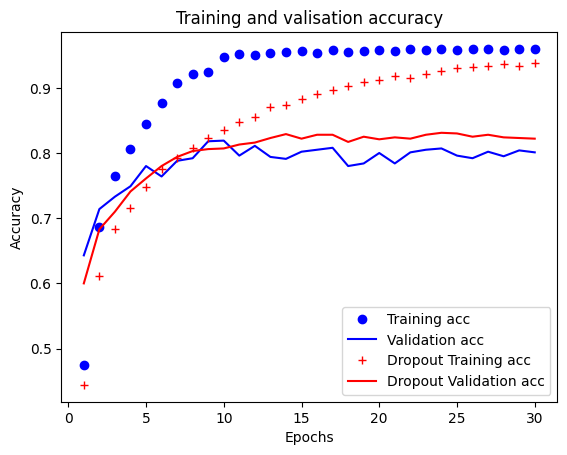

In [46]:
acc = history_dic['accuracy']
val_acc = history_dic['val_accuracy']

d_acc = d_history_dic['accuracy']
d_val_acc = d_history_dic['val_accuracy']

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label= "Validation acc")

plt.plot(epochs, d_acc, 'r+', label = "Dropout Training acc")
plt.plot(epochs, d_val_acc, 'r', label= "Dropout Validation acc")

plt.title('Training and valisation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluate the model

In [47]:
result = model.evaluate(x_test, y_test)
d_result = d_model.evaluate(x_test, y_test)
print(f'Original model : {result}')
print(f'Dropout model : {d_result}')

71/71 [==============================] - 0s 2ms/step - loss: 1.1433 - accuracy: 0.7996
Original model : [1.2040293216705322, 0.780053436756134]
Dropout model : [1.143325686454773, 0.7996438145637512]


Using the trainned model to predic

In [48]:
prediction = model.predict(x_test)
print(np.argmax(prediction[1]))

71/71 [==============================] - 0s 2ms/step
10
